# 4.4 Artificial Neural Networks for Regression

_By: Ling Li Ya, Liana_

## 4.4.1 Pre-training preparation

### Installing dependencies

In [1]:
!pip install tensorflow
!pip install keras

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

2021-12-02 13:34:34.534224: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-02 13:34:34.534546: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Loading data

In [3]:
# Cleaned dataset with no outliers
X_train_no = pd.read_csv('../dataset/no_outliers/X_train.csv')
X_test_no = pd.read_csv('../dataset/no_outliers/X_test.csv')
y_train_no = pd.read_csv('../dataset/no_outliers/y_train.csv')
y_test_no = pd.read_csv('../dataset/no_outliers/y_test.csv')

# Uncleaned original data
X_train_with = pd.read_csv('../dataset/with_outliers/X_train.csv')
X_test_with = pd.read_csv('../dataset/with_outliers/X_test.csv')
y_train_with = pd.read_csv('../dataset/with_outliers/y_train.csv')
y_test_with = pd.read_csv('../dataset/with_outliers/y_test.csv')

In [4]:
# def standardise_data(X_train, y_train, X_test, y_test):
    # X_scaler = StandardScaler()
    # y_scaler = StandardScaler()

    # # Scale data to standardise data values
    # X_train_trans = X_scaler.fit_transform(X_train)
    # y_train_trans = y_scaler.fit_transform(y_train)
    # X_test_trans = X_scaler.transform(X_test)
    # y_test_trans = y_scaler.transform(y_test)
    
    # print(X_train_trans.shape, y_train_trans.shape, X_test_trans.shape, y_test_trans.shape)

    # return X_scaler, y_scaler, X_train_trans, y_train_trans, X_test_trans, y_test_trans
    # return X_scaler, y_scaler, X_train, y_train, X_test, y_test

# X_scaler_no, y_scaler_no, X_train_no_trans, y_train_no_trans, X_test_no_trans, y_test_no_trans = standardise_data(X_train_no, y_train_no, X_test_no, y_test_no)
X_train_no_trans, y_train_no_trans, X_test_no_trans, y_test_no_trans = X_train_no.to_numpy(), y_train_no.to_numpy(), X_test_no.to_numpy(), y_test_no.to_numpy()

## 4.4.2 Training

Using a layer with 5 neurons, with 9 input dimensions of normal weight, using relu activation function. Batch size is 20 and training epochs are 50.

In [5]:
def create_seq_model():
    model = Sequential()

    # Defining the input layer and first hidden layer
    model.add(Dense(units=5, input_dim=9, kernel_initializer='normal', activation='relu'))

    # Defining the second layer of the model
    model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

    # The output neuron is a single fully connected node as only a single number is predicted
    model.add(Dense(1, kernel_initializer='normal'))

    # Compiling the model
    model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

    return model

def train_model(model, X_train, y_train):
    # Fitting the ANN to the training data
    model.fit(X_train, y_train, batch_size=20, epochs=50, verbose=1)

    return model

model_no = create_seq_model()
model_no = train_model(model_no, X_train_no_trans, y_train_no_trans)

2021-12-02 13:34:37.028880: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (100)
2021-12-02 13:34:37.028960: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Liana-ASUS): /proc/driver/nvidia/version does not exist
2021-12-02 13:34:37.029639: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
29/29 [==============================] - 0s 1ms/step - loss: 0.3079 - mse: 0.3079 - mae: 0.5074
Epoch 2/50
29/29 [==============================] - 0s 2ms/step - loss: 0.2586 - mse: 0.2586 - mae: 0.4568
Epoch 3/50
29/29 [==============================] - 0s 3ms/step - loss: 0.1718 - mse: 0.1718 - mae: 0.3576
Epoch 4/50
29/29 [==============================] - 0s 858us/step - loss: 0.0757 - mse: 0.0757 - mae: 0.2283
Epoch 5/50
29/29 [==============================] - 0s 910us/step - loss: 0.0402 - mse: 0.0402 - mae: 0.1627
Epoch 6/50
29/29 [==============================] - 0s 968us/step - loss: 0.0379 - mse: 0.0379 - mae: 0.1572
Epoch 7/50
29/29 [==============================] - 0s 915us/step - loss: 0.0358 - mse: 0.0358 - mae: 0.1530
Epoch 8/50
29/29 [==============================] - 0s 896us/step - loss: 0.0325 - mse: 0.0325 - mae: 0.1457
Epoch 9/50
29/29 [==============================] - 0s 857us/step - loss: 0.0272 - mse: 0.0272 - mae: 0.1331
Epoch 10/50
29/29 [======

#### Using data with outliers

In [11]:
# X_scaler_with, y_scaler_with, X_train_with_trans, y_train_with_trans, X_test_with_trans, y_test_with_trans = standardise_data(X_train_with, y_train_with, X_test_with, y_test_with)
X_train_with_trans, y_train_with_trans, X_test_with_trans, y_test_with_trans = X_train_with.to_numpy(), y_train_with.to_numpy(), X_test_with.to_numpy(), y_test_with.to_numpy()

In [12]:
model_with = create_seq_model()
model_with = train_model(model_with, X_train_with_trans, y_train_with_trans)

Epoch 1/50
30/30 [==============================] - 0s 877us/step - loss: 0.3033 - mse: 0.3033 - mae: 0.5040
Epoch 2/50
30/30 [==============================] - 0s 922us/step - loss: 0.2443 - mse: 0.2443 - mae: 0.4427
Epoch 3/50
30/30 [==============================] - 0s 856us/step - loss: 0.1558 - mse: 0.1558 - mae: 0.3383
Epoch 4/50
30/30 [==============================] - 0s 811us/step - loss: 0.0679 - mse: 0.0679 - mae: 0.2137
Epoch 5/50
30/30 [==============================] - 0s 878us/step - loss: 0.0377 - mse: 0.0377 - mae: 0.1579
Epoch 6/50
30/30 [==============================] - 0s 901us/step - loss: 0.0356 - mse: 0.0356 - mae: 0.1527
Epoch 7/50
30/30 [==============================] - 0s 796us/step - loss: 0.0332 - mse: 0.0332 - mae: 0.1478
Epoch 8/50
30/30 [==============================] - 0s 815us/step - loss: 0.0296 - mse: 0.0296 - mae: 0.1391
Epoch 9/50
30/30 [==============================] - 0s 828us/step - loss: 0.0253 - mse: 0.0253 - mae: 0.1286
Epoch 10/50
30/30 [

## 4.4.3 Hyperparameter tuning

To find the best accuracy with the minimum number of layers/neurons.

### Grid search

Mean Square Error (MSE) is used with the formula `(sum of all (y_true - y_pred)^2)/total number of y_true`

In [6]:
# Find the best parameters for ANN
def find_best_params(X_train, y_train, X_test, y_test):

    print(type(y_test))
    
    # Defining the list of hyper parameters to try
    batch_size_list = [5, 10, 15, 20]
    epoch_list = [5, 10, 50, 100]

    results = pd.DataFrame(columns=['trial_num', 'param', 'accuracy'])
    
    # Initialising the trials
    trial_number = 0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            trial_number += 1
            # Create ANN model
            model = Sequential()

            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # Output neuron
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            pred = model.predict(X_test)

            MSE = 0
            for i in range(y_test.shape[0]):
                MSE += (y_test[i,0] - pred[i][0])**2

            MSE /= y_test.shape[0]
            
            # Printing the results of the current iteration
            print(trial_number, 'Parameters:','batch_size:', batch_size_trial,'-', 'Epochs:',epochs_trial, 'MSE:', MSE)
            
            results = results.append(pd.DataFrame(data=[[trial_number, str(batch_size_trial)+'-'+str(epochs_trial), MSE]], columns=['trial_num', 'param', 'mse'] ))

    return(results)

results_no = find_best_params(X_train_no_trans, y_train_no_trans, X_test_no_trans, y_test_no_trans)

<class 'numpy.ndarray'>
1 Parameters: batch_size: 5 - Epochs: 5 MSE: 0.017635188410956966
2 Parameters: batch_size: 5 - Epochs: 10 MSE: 0.01403044278123201
3 Parameters: batch_size: 5 - Epochs: 50 MSE: 0.008130271051181017
4 Parameters: batch_size: 5 - Epochs: 100 MSE: 0.007804983862675252
5 Parameters: batch_size: 10 - Epochs: 5 MSE: 0.032442627737033325
6 Parameters: batch_size: 10 - Epochs: 10 MSE: 0.015060443617070094
7 Parameters: batch_size: 10 - Epochs: 50 MSE: 0.00837337365383405
8 Parameters: batch_size: 10 - Epochs: 100 MSE: 0.010940945560182455
9 Parameters: batch_size: 15 - Epochs: 5 MSE: 0.041065336039560855
10 Parameters: batch_size: 15 - Epochs: 10 MSE: 0.020831606351105397
11 Parameters: batch_size: 15 - Epochs: 50 MSE: 0.008410321237324514
12 Parameters: batch_size: 15 - Epochs: 100 MSE: 0.010834147090105151
13 Parameters: batch_size: 20 - Epochs: 5 MSE: 0.04697578592542259
14 Parameters: batch_size: 20 - Epochs: 10 MSE: 0.026136945057218794
15 Parameters: batch_size: 

### Plotting results

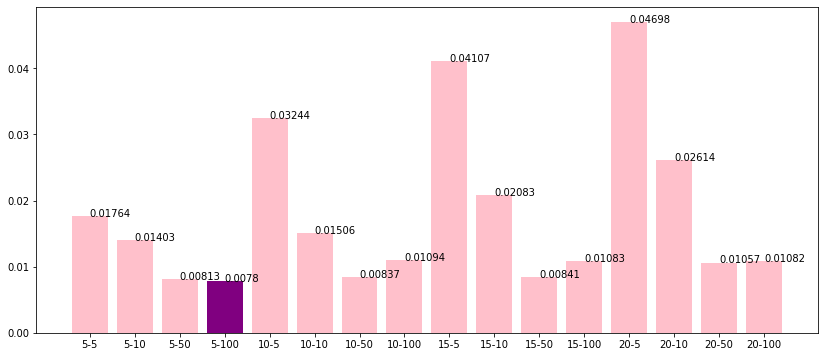

In [7]:
def plot_bar_chart(results):
    plt.figure(figsize=(14,6))
    colors = ['pink' if result != min(results['mse']) else 'purple' for result in results['mse']]
    plt.bar(results['param'], height=results['mse'], color=colors)
    # plt.axhline(y=1.0, color='purple', linestyle='-')
    for a, b in zip([x for x in range(len(results['mse']))], round(results['mse'], 5)):
        plt.text(a, b, str(b), color='black')
    plt.show()

plot_bar_chart(results_no)

For MSE, a lower value is better. From the graph above, it can be known that the best hyperparameters are `batch_size` = 5 and `epochs` = 100.

In [8]:
def evaluate_model(test_data):
    # Sum of squared error
    test_data['SE'] = (test_data['count'] - test_data['pred_count'])**2
    r2 = r2_score(test_data['count'], test_data['pred_count'])

    print(test_data.head())

    print("r2: ", r2)
    print("MSE: ", np.mean(test_data['SE']))

## 4.4.4 Fine-tuning and evaluation

In [15]:
# Fine-tune hyperparameters
# def fine_tune_model(model, batch_size, epochs, X_scaler, y_scaler, X_train_trans, y_train_trans, X_test_trans, y_test_trans, columns):
def fine_tune_model(model, batch_size, epochs, X_train_trans, y_train_trans, X_test_trans, y_test_trans, columns):
    model.fit(X_train_trans, y_train_trans, batch_size=batch_size, epochs=epochs, verbose=0)

    pred = model.predict(X_test_trans)

    test_data_scaled = pd.DataFrame(data=X_test_trans, columns=columns)
    test_data_scaled['count'] = y_test_trans
    test_data_scaled['pred_count'] = pred
    evaluate_model(test_data_scaled)
    return test_data_scaled

test_data_no = fine_tune_model(
        model=model_no,
        batch_size=5,
        epochs=100,
        # X_scaler=X_scaler_no,
        # y_scaler=y_scaler_no,
        X_train_trans=X_train_no_trans,
        y_train_trans=y_train_no_trans,
        X_test_trans=X_test_no_trans,
        y_test_trans=y_test_no_trans,
        columns=X_test_no.columns
    )

     season  year     month  holiday   weekday  weather  temperature  \
0  0.666667   1.0  0.545455      0.0  0.000000      0.0     0.838615   
1  0.333333   1.0  0.363636      0.0  0.666667      0.0     0.676174   
2  0.666667   1.0  0.636364      0.0  0.833333      0.5     0.894519   
3  0.333333   1.0  0.272727      0.0  0.833333      0.0     0.435679   
4  1.000000   1.0  0.909091      0.0  0.166667      0.0     0.329145   

   humidity  windspeed     count  pred_count        SE  
0  0.499402   0.337110  0.770538    0.808525  0.001443  
1  0.350479   0.492593  0.862768    0.818375  0.001971  
2  0.526316   0.456582  0.838275    0.790218  0.002309  
3  0.145335   0.679220  0.754483    0.648287  0.011277  
4  0.313398   0.510620  0.613735    0.593400  0.000413  
r2:  0.8610889177637269
MSE:  0.007985720980195267


In [10]:
model_no.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 50        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 86
Trainable params: 86
Non-trainable params: 0
_________________________________________________________________


#### Using Data With Outliers

The same `batch_size` and `epochs` are used for accuracy comparison.

In [16]:
test_data_with = fine_tune_model(
    model=model_with,
    batch_size=5,
    epochs=100,
    X_train_trans=X_train_with_trans,
    y_train_trans=y_train_with_trans,
    X_test_trans=X_test_with_trans,
    y_test_trans=y_test_with_trans,
    columns=X_test_with.columns,
)

     season  year     month  holiday   weekday  weather  temperature  \
0  0.666667   0.0  0.545455      0.0  1.000000      0.0     0.794313   
1  0.666667   0.0  0.545455      0.0  0.666667      0.0     0.874478   
2  0.000000   0.0  0.000000      0.0  1.000000      0.5     0.220499   
3  0.000000   0.0  0.090909      0.0  0.333333      0.5     0.168402   
4  0.000000   1.0  0.000000      0.0  0.666667      0.5     0.357625   

   humidity  windspeed     count  pred_count        SE  
0  0.443780   0.436975  0.691550    0.562434  0.016671  
1  0.538876   0.307644  0.535568    0.540551  0.000025  
2  0.319976   0.304389  0.143677    0.201897  0.003389  
3  0.794830   0.028710  0.156803    0.123195  0.001129  
4  0.708732   0.081826  0.474979    0.430659  0.001964  
r2:  0.8544147523979604
MSE:  0.008504011624982854


In [14]:
model_with.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 5)                 50        
                                                                 
 dense_52 (Dense)            (None, 5)                 30        
                                                                 
 dense_53 (Dense)            (None, 1)                 6         
                                                                 
Total params: 86
Trainable params: 86
Non-trainable params: 0
_________________________________________________________________


In conclusion, using cleaned data without outliers would give a higher accuracy than using data with outliers.